In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log10, sqrt 

img = cv2.imread('img3.jpg')

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 



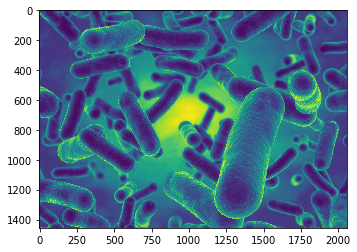

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
kernel = np.ones((3,3),np.uint8)

plt.imshow(gray)

PSNR:  33.25727899733456
30.71513730926674


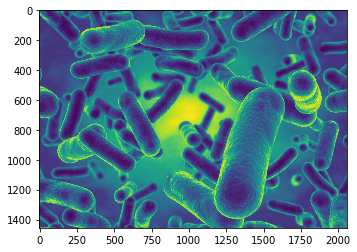

In [3]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(gray, kernel, iterations = 1)

value = PSNR(gray, dilation) 
print("PSNR: ",value)

Y = np.square(np.subtract(gray,dilation)).mean()
print(Y)

plt.imshow(dilation)

PSNR :  40.98606254638096
MSE: 5.181721963078204


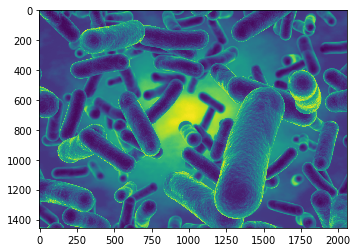

In [4]:
erosion = cv2.erode(dilation,kernel,iterations = 1)

value = PSNR(gray, erosion) 
print("PSNR : ", value)

Y = np.square(np.subtract(gray,erosion)).mean()
print("MSE:", Y)

plt.imshow(erosion)

# cv2.imshow('Gray image', gray)
# cv2.imshow('Image after erosion', erosion)
# cv2.imshow('Image after erosion', opening)
# cv2.imshow('Image after erosion', closing)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

PSNR:  39.14623331531985
MSE: 7.915111357801984


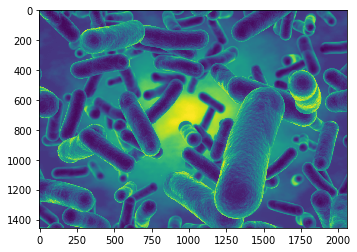

In [5]:

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)

value = PSNR(gray, opening) 
print("PSNR: " ,value)

Y = np.square(np.subtract(gray,opening)).mean()
print("MSE:", Y)
plt.imshow(opening)


PSNR:  39.15056309052915
MSE: 7.907224180627532


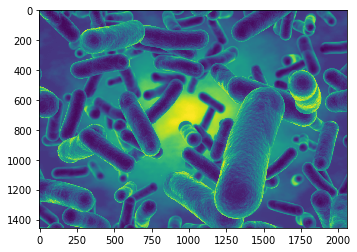

In [6]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

value = PSNR(gray, closing) 
print("PSNR: ", value)
Y = np.square(np.subtract(gray,closing)).mean()
print("MSE:", Y)

plt.imshow(closing)